#***Carlos Gross-Martinez***
#***Reinforcement Learning***
#***Link to Google Collab Notebook***
#https://colab.research.google.com/drive/1nPFf16OpuU_7Slf2IBiosKAKgijRaLti?usp=sharing

#***Q-Learning***
#Q-Learning is an reinforcement learning technique which has the ability to learn the best action of an agent in a particular state. Additionally, Q-learning finds an optimal policy by maximizing the expected value of the total reward over any and all successive states.

#***Q-Leanning Algorithm***
#initialize Q(S,A) table to 0
#observe current state
#do until Q(S,A) table merges and is complete:
#select action and execute
#obtain reward
#observe new future state
#update Q(S,A) table
#exit loop and move to the next state

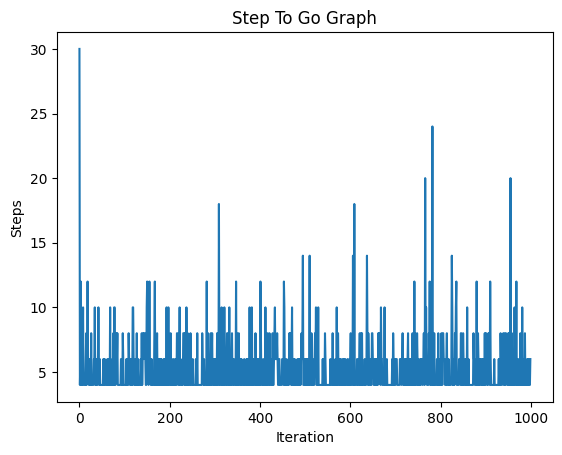

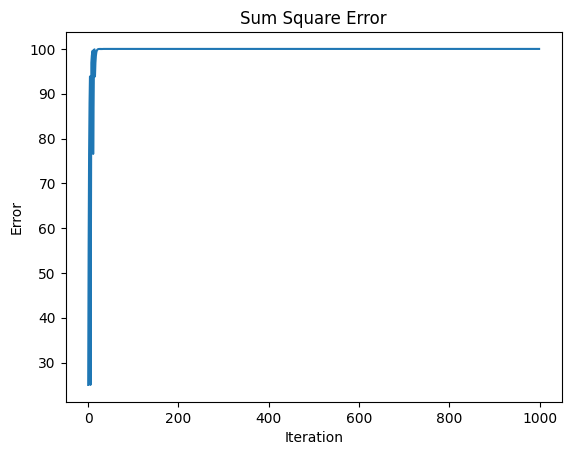


Q(S,A) Table:
  State            Up          Down          Left         Right
0    s0  0.000000e+00  5.533331e-74  0.000000e+00  6.546210e-74
1    s1  0.000000e+00  8.807899e-74  3.840376e-74  8.527936e-74
2    s2  0.000000e+00  1.382627e-73  1.658156e-73  0.000000e+00
3    s3  9.226147e-74  3.058184e-73  0.000000e+00  1.339993e-73
4    s4  8.410218e-74  1.534437e-73  7.407679e-74  9.259971e-74
5    s5  1.210513e-73  1.000000e+01  1.100056e-73  0.000000e+00
6    s6  1.463058e-73  0.000000e+00  0.000000e+00  2.091960e-73
7    s7  7.624072e-74  0.000000e+00  1.212830e-73  1.000000e+01
8    s8  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00


In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#function that translate corrdinates to states
def states (coordinates):

    if coordinates[0] == 0 and coordinates[1] == 0:
        state = "s0"

    elif coordinates[0] == 0 and coordinates[1] == 1:
        state = "s1"

    elif coordinates[0] == 0 and coordinates[1] == 2:
        state = "s2"

    elif coordinates[0] == 1 and coordinates[1] == 0:
        state = "s3"

    elif coordinates[0] == 1 and coordinates[1] == 1:
        state = "s4"

    elif coordinates[0] == 1 and coordinates[1] == 2:
        state = "s5"

    elif coordinates[0] == 2 and coordinates[1] == 0:
        state = "s6"

    elif coordinates[0] == 2 and coordinates[1] == 1:
        state = "s7"

    else:
        state = "s8"

    return state

#function that calculates the possibkle actions based on states
def possible_actions(current_state):

    #actions: up 1, down = 2, left = 3, right = 4
    if current_state == "s0": #top left corner
        actions = (2, 4)

    elif current_state == "s2": #top right corner
        actions = (2, 3)

    elif current_state == "s6": #bottom left corner
        actions = (1, 4)

    elif current_state == "s8": #bottom right corner
        actions = (1, 3)

    elif current_state == "s1": #top edge states
        actions = (2, 3, 4)

    elif current_state == "s7": #bottom edge states
        actions = (1, 3, 4)

    elif current_state == "s3": #left edge states
        actions = (1, 2, 4)

    elif current_state == "s5": #right edge states
        actions = (1, 2, 3)

    else:
        actions = (1, 2, 3, 4) #states not at the edges

    return actions

#function that calculates the next state
def calc_next_state(act, cur_loc):

    temp = np.zeros(2)

    #condition that provides coordinates of next state
    #actions: up 1, down = 2, left = 3, right = 4
    if act == 1:
        if cur_loc[0] > 0:
            temp[1] = cur_loc[1]
            temp[0] = cur_loc[0] - 1

    elif act == 2:
        if cur_loc[0] < 2:
            temp[1] = cur_loc[1]
            temp[0] = cur_loc[0] + 1

    elif act == 3:
        if cur_loc[1] > 0:
            temp[0] = cur_loc[0]
            temp[1] = cur_loc[1] - 1
    else:
        if cur_loc[1] < 2:
            temp[0] = cur_loc[0]
            temp[1] = cur_loc[1] + 1

    return temp


#function that returns the index of the state in qSA table
def cal_state_index (curr_st, qSA):

    for i in range(len(qSA)):
        if qSA[i][0] == curr_st:
            return i

#function that compares all rewards from actions in next state and returns max value
def get_max_act_next_st(next_state, qSA):

    temp_max = 0

    for i in range (len(qSA)):
        if qSA[i][0] == next_state:
            for j in range(1, 5):
                if temp_max < qSA[i][j]:
                    return qSA[i][j]

    return temp_max

#function that updates the qSA table and calculates error
def update_qSA(curr_st, next_state, action, qSA, rewards):

    alpha = 0.5
    gamma = 0.5

    cur_st_id_qSA = cal_state_index(curr_st, qSA)

    #Qlearning equation calculation
    qSA[cur_st_id_qSA][action] = ((1 - alpha) * qSA[cur_st_id_qSA][action]) + alpha * (rewards[cur_st_id_qSA][action] + (gamma * get_max_act_next_st(next_state, qSA)))

    #calculating error of current iteration
    current_iter_error.append(abs(get_max_act_next_st(next_state, qSA) - qSA[cur_st_id_qSA][action]) ** 2)

#funnction that randomly selects an 30% exploration and 70% greedy
def select_action(cur_cdnt, curr_st, poss_act, qSA, rewards):

    #condition that selects greedy or exploration actions
    if np.random.uniform(0, 1) <= 0.3:

        #if the condition is exploration, chose random action
        rand_action = np.random.choice(poss_act)
        next_state_coordinate = calc_next_state(rand_action, cur_cdnt)
        next_state = states(next_state_coordinate)
        update_qSA(curr_st, next_state, rand_action, qSA, rewards)
        return rand_action

    else:

        #if the condition is greedy, traverse through all possible actions
        #to determine best action
        for actions in poss_act:

            next_state_coordinate = calc_next_state(actions, cur_cdnt)
            next_state = states(next_state_coordinate)
            update_qSA(curr_st, next_state, actions, qSA, rewards)

    #selecting a ramdon action initially
    action = np.random.choice(poss_act)
    cur_st_id = cal_state_index (curr_st, qSA)

    #setting temp_max to initial qSA value
    temp_max = qSA[cur_st_id][1]

    #traversing through qSA value for action to find the greediest
    for i in range(2, 5):

        if temp_max < qSA[cur_st_id][i]:
            action = i
            temp_max = qSA[cur_st_id][i]

    return action

##########################################################
#Code starts
##########################################################

#declaration and initialization of rewards table
rewards = (("s0", 0, 0, 0, 0),
           ("s1", 0, 0, 0, 0),
           ("s2", 0, 0, 0, 0),
           ("s3", 0, 0, 0, 0),
           ("s4", 0, 0, 0, 0),
           ("s5", 0, 10, 0, 0),
           ("s6", 0, 0, 0, 0),
           ("s7", 0, 0, 0, 10),
           ("s8", 0, 0, 0, 0),
          )

#declaration and initialization of qSA table
qSA = [["s0", 0, 0, 0, 0],
       ["s1", 0, 0, 0, 0],
       ["s2", 0, 0, 0, 0],
       ["s3", 0, 0, 0, 0],
       ["s4", 0, 0, 0, 0],
       ["s5", 0, 0, 0, 0],
       ["s6", 0, 0, 0, 0],
       ["s7", 0, 0, 0, 0],
       ["s8", 0, 0, 0, 0],
      ]


#declaration and initialization of variables
goal_coordinate = [2,2]
start_coordinate = [0,0]
current_state_coordinate = []

iteration = []
error_list = []
steps_list = []

#conducting 1000 iterations of program
for i in range(0, 1000):

    #declaration and initialization of variables
    steps = 0
    found_goal = False
    current_iter_error = []
    current_state_coordinate = start_coordinate

    #loop that will not stop until goal coordinate is entered
    while found_goal!= True:

        #determining current state from coordinates
        curr_st = states(current_state_coordinate)

        #calculating possible moves based on location
        poss_act = possible_actions(curr_st)

        #determinig action to complete
        action = select_action(current_state_coordinate, curr_st, poss_act, qSA, rewards)

        #updating coordinates to the ones in thext state
        current_state_coordinate = calc_next_state(action, current_state_coordinate)

        #counting the steps taken by algorithm
        steps += 1

        #checking if the step is the goal state after making the move
        if goal_coordinate[0] == current_state_coordinate[0] and goal_coordinate[1] == current_state_coordinate[1]:
            found_goal = True


    #appending information to list to graph
    iteration.append(i)
    steps_list.append(steps)
    error_list.append(max(current_iter_error))

#plotting step to go graph
plt.title("Step To Go Graph")
plt.xlabel("Iteration")
plt.ylabel("Steps")
plt.plot(iteration, steps_list)
plt.show()

#plotting SSE
plt.title("Sum Square Error")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(iteration, error_list)
plt.show()


df = pd.DataFrame(qSA, columns = ['State', 'Up', 'Down', 'Left', 'Right'])
print('')
print('Q(S,A) Table:')
print(df)

#***First Visit Monte Carlo***
#The Monte Carlo algorithms is also well known as the Monte Carlo Method or multiple probability simulation. This technique have different variations and it is used to estimate the possible results of an undetermine event. It works by creating a model of possible results by taking into consideration the distribution of an uncertain variable. It recalculates these results many times injecting ramdomness in the variables through every iteration.

#***Monte Carlo Algorithm***
#initialize policy to be evaluated
#initialize V which contains the arbitrary state-value function
#initialize an empty set to for all states call retunrs
#do until merge and is complete:
#using the policy generate an episide
#for each state in the episode do the following:
#determine the reward of the state and save in variable G
#append the value of G to returns variable
#Average the value of returs and save to V variable

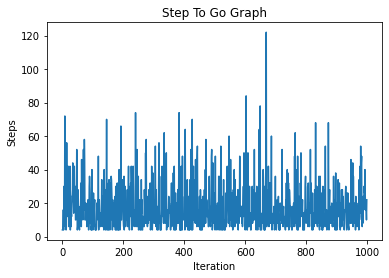

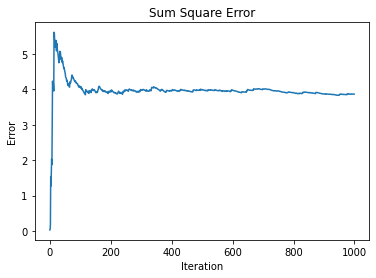


Estimated State Values:
State: (0, 0) Estimated Value: -1.0783396457311154
State: (0, 1) Estimated Value: -1.3480784927500218
State: (0, 2) Estimated Value: -0.9222707369452856
State: (1, 0) Estimated Value: -1.3079440335273267
State: (1, 1) Estimated Value: -1.3533760510186192
State: (1, 2) Estimated Value: -0.9546236584436191
State: (2, 0) Estimated Value: -0.8015019168468249
State: (2, 1) Estimated Value: -0.8284798110190822


In [ ]:
import random
import matplotlib.pyplot as plt

#function that moves the agent randomly in environment
def move_agent(position):
    moves = []
    if position[0] > 0:
        moves.append((-1, 0))  # Move up
    if position[0] < 2:
        moves.append((1, 0))  # Move down
    if position[1] > 0:
        moves.append((0, -1))  # Move left
    if position[1] < 2:
        moves.append((0, 1))  # Move right
    return tuple(map(sum, zip(position, random.choice(moves))))

# funtion that checks is the current state is the goal state
def reached_goal(position):
    return position == goal

#function which calculates discounted return for sequence of rewards
def calculate_return(rewards, discount_factor):
    total_reward = 0
    discount = 1
    for reward in rewards:
        total_reward += discount * reward
        discount *= discount_factor
    return total_reward

##########################################################
#Code starts
##########################################################

#create maze, the 1 represents obtacle
maze = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 2]
]

#variable declaration and initialization
start = (0, 0)
goal = (2, 2)
num_simulations = 1000
state_counts = {}
state_rewards = {}
iteration = []
mse_per_iter = []
step_per_iter_count = []

for i in range(num_simulations):

    #variable declaration and initialization
    steps = 0
    position = start
    states_visited = []
    rewards = []

    #loop that will not end until goal is reached
    while not reached_goal(position):

        #adding start position to list
        states_visited.append(position)

        #moving agent from current position
        position = move_agent(position)

        #variable declaration and initialization
        reward = 0

        #giving negative reward to agent for stepping into wall
        if maze[position[0]][position[1]] == 1:
            reward = -1

        #adding reward to rewards list
        rewards.append(reward)

        #counting the step
        steps += 1

    #giving positive reward to agent for reaching goal
    rewards.append(1)

    #adding steps and iteration number to respective lists
    iteration.append(i)
    step_per_iter_count.append(steps)

    #loop that calculates the state rewards
    for state in states_visited:

        #initializing variables if state not in state_rewards variable
        if state not in state_rewards:
            state_rewards[state] = 0
            state_counts[state] = 0

        #calculating state rewards
        state_rewards[state] += calculate_return(rewards[states_visited.index(state):], 0.9)

        #updating value of state_counts
        state_counts[state] += 1


    #variable declaration and initialization
    mse = 0

    #calculating mse for current iteration with nested for loop
    for i in range(3):
        for j in range(3):
            position = (i, j)

            #checking if position is in rewards_position variable
            if position in state_rewards:

                #calculating poaaible value
                estimated_value = state_rewards[position] / state_counts[position]

                #value of goal state is 1
                actual_value = 1

                #adding square error to variable mse
                mse += (actual_value - estimated_value) ** 2

    #dividing by 9 to get MSE value
    mse /= 9

    #appending MSE of current iteration to list
    mse_per_iter.append(mse)

#plotting step to go graph
plt.title("Step To Go Graph")
plt.xlabel("Iteration")
plt.ylabel("Steps")
plt.plot(iteration, step_per_iter_count)
plt.show()

#plotting SSE
plt.title("Sum Square Error")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(iteration, mse_per_iter)
plt.show()

#print MSE values
print("")
print("Estimated State Values:")
for i in range(3):
    for j in range(3):
        position = (i, j)
        if position in state_rewards:
            print("State:", position, "Estimated Value:", state_rewards[position] / state_counts[position])

#***END***